In [34]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
#importing necessory libraries

In [4]:
df = pd.read_csv('spam.csv' , encoding = 'ISO-8859-1') #reading dataset

In [6]:
df.head() #gives first  entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail() #gives last 5  entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [49]:
df.sample(10)

,Target,Message
3043,0,Let me know how it changes in the next 6hrs. I...
1295,0,TELL HER I SAID EAT SHIT.
245,0,Too late. I said i have the website. I didn't ...
1752,0,Give one miss from that number please
5398,0,Hi. Hope you had a good day. Have a better night.
5110,1,You have 1 new message. Please call 08715205273
1472,0,Just sent you an email ÛÒ to an address with ...
2686,0,There r many model..sony ericson also der.. &l...
1583,0,"It's cool, let me know before it kicks off aro..."
1681,0,Y lei?


In [5]:
df.shape

(5572, 5)

In [6]:
df.size 

27860

In [7]:
df.info()  # give inforamtion about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.describe()   #gives Description about dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [50]:
df.columns

Index(['Target', 'Message'], dtype='object')

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

In [13]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep='first',inplace=True) #removing duplicate values

In [16]:
df.duplicated().sum()

0

In [17]:
df.size

10338

In [18]:
# labe encoding 
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [18]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


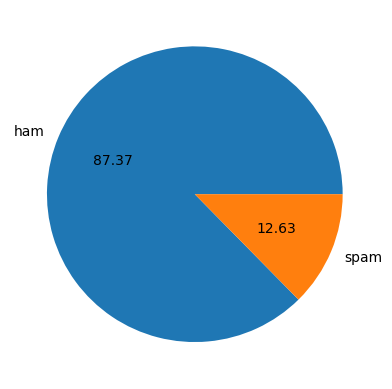

In [42]:
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [20]:
x=df['Message']
y=df['Target']

In [21]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object


In [22]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)  #splitting data into train and test

In [25]:
cv=CountVectorizer()

In [26]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [27]:
print(x_train_cv)

  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [28]:
lr=LogisticRegression() # training model logistic training

In [29]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [30]:
print( "Acuuracy :",accuracy_score(y_train, prediction_train)*100)

Acuuracy : 99.75816203143893


In [31]:
prediction_test = lr.predict(x_test_cv)

In [32]:
print( " Accuracy:" ,accuracy_score(y_test, prediction_test)*100)

 Accuracy: 97.58220502901354


In [38]:
def changement(email):
    # Your implementation for processing the email
    # For example, converting to lowercase
    return email.lower()


In [39]:
user_mail = "SomeEmailAddress@Example.com"
processed = changement(user_mail)
print(processed)


someemailaddress@example.com


In [35]:
user_mail = input("Enter the text of the email :\n\n")

Enter the text of the email :

sakshitripathi@gmail.com


In [40]:
processed=changement(user_mail)
processed

'someemailaddress@example.com'

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a function named 'changement' for processing the email
def changement(email):
    # Your implementation for processing the email
    # For example, converting to lowercase
    return email.lower()

# Example email
user_mail = "SomeEmailAddress@Example.com"

# Process the email
processed = changement(user_mail)

# Creating a TfidfVectorizer for feature extraction
feature_extraction = TfidfVectorizer()

# Examples of training data
training_data = ["example email text 1", "example email text 2", "example email text 3"]

# Fiting the vectorizer on the training data
feature_extraction.fit(training_data)

# Transforming the processed email using the fitted vectorizer
input_data_features = feature_extraction.transform([processed])

# Print the features
print("After Feature Extraction :\n\n", input_data_features)


After Feature Extraction :

   (0, 1)	1.0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a function named 'changement' for processing the email
def changement(email):
    # Your implementation for processing the email
    # For example, converting to lowercase
    return email.lower()

# Example email
user_mail = "SomeEmailAddress@Example.com"

# Process the email
processed = changement(user_mail)

# Example training data and labels
training_data = ["example email text 1", "example email text 2", "example email text 3"]
labels = [0, 1, 0]  # Replace with your actual labels (0 or 1)

# Create a TfidfVectorizer for feature extraction
feature_extraction = TfidfVectorizer()
X_train = feature_extraction.fit_transform(training_data)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, labels)

# Transform the processed email using the fitted vectorizer
input_data_features = feature_extraction.transform([processed])

# Make predictions
predicted_output = model.predict(input_data_features)

# Print the predicted output
print("Predicted Output:\n\n", predicted_output)


Predicted Output:

 [0]


In [48]:
if (predicted_output[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')

Non-Spam mail


In [52]:
pip install wordcloud


                                              0.0/151.4 kB ? eta -:--:--
     ---------------------                   81.9/151.4 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email


import sklearn as sk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Sakshi
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Sakshi
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\Sakshi
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package omw-1.4 to C:\Users\Sakshi
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sakshi Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [54]:
import os
for (root,dirs,files) in os.walk('enron_dataset', topdown=True):
    print (root)
    print (dirs)
    print (files)
    print ('--------------------------------')

In [55]:
pathwalk = walk(r"spam.csv")

allHamData, allSpamData = [], []
for root, dr, file in pathwalk:
    if 'ham' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allHamData.append(" ".join(ip.readlines()))
                
    elif 'spam' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allSpamData.append(" ".join(ip.readlines()))

In [56]:
hamPlusSpamData = allHamData + allSpamData
labels = ["ham"]*len(allHamData) + ["spam"]*len(allSpamData)

raw_df = pd.DataFrame({"email": hamPlusSpamData, 
                       "label": labels})

In [58]:
raw_df.info() #checking or exploring data for null or duplicate values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   email   0 non-null      float64
 1   label   0 non-null      float64
dtypes: float64(2)
memory usage: 132.0 bytes


# Text processing

In [66]:
import string
# Function to remove punctuations.
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

df["body_text_clean"] = df["Message"].apply(lambda x: remove_punc(x))

df.head()

,Target,Message,body_text_clean
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [68]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

df["body_text_tokenized"] = df["body_text_clean"].apply(lambda x: tokenize(x))

df.head()

,Target,Message,body_text_clean,body_text_tokenized
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."


In [69]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

df["body_text_nonstop"] = df["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
df.head()

,Target,Message,body_text_clean,body_text_tokenized,body_text_nonstop
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."


In [70]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

df["body_text_stemmed"] = df["body_text_nonstop"].apply(lambda x: stemming(x))
df.head()

,Target,Message,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ..."


In [71]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

df["body_text_lemmatized"] = df["body_text_stemmed"].apply(lambda x: lemmatizer(x))
df.head()

,Target,Message,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[nah, i, dont, think, goe, usf, live, around, ..."


# email spam dectection

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset 
data = {
    'text': ['Discounts on luxury watches!', 'Hello, how are you?', 'Win a free iPhone now!', 'Meeting tomorrow at 10 AM'],
    'label': [1, 0, 1, 0]  # 1 for spam, 0 for not spam (ham)
}

df = pd.DataFrame(data)

# Function to clean and preprocess text data
def preprocess_text(text):
    # text preprocessing (e.g., removing punctuation, converting to lowercase)
    return text

# Applying text preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# Creating TfidfVectorizer for feature extraction
tfidf_vectorizer = TfidfVectorizer()

# Fiting and transforming the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Creating and training the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Transforming the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# for predictions
predictions = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluation of the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Users input for prediction
user_input = input("Enter an email text: ")
user_input_cleaned = preprocess_text(user_input)
user_input_tfidf = tfidf_vectorizer.transform([user_input_cleaned])

# prediction for user input
user_input_prediction = naive_bayes_classifier.predict(user_input_tfidf)

if user_input_prediction[0] == 1:
    print("The entered email is classified as spam.")
else:
    print("The entered email is not spam (ham).")


C:\Users\Sakshi Tripathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sakshi Tripathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sakshi Tripathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sakshi Tripathi\anaconda

Accuracy: 0.0
Confusion Matrix:
[[0 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Enter an email text: go to hell
The entered email is classified as spam.
